In [1]:
import os
import re
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
#import seaborn as sns
#from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img
import tensorflow as tf
from tensorflow.keras.utils import Sequence
import numpy as np

ModuleNotFoundError: No module named 'google.protobuf'; 'google' is not a package

In [71]:
# Definisci il percorso principale del dataset e le cartelle dei giorni di infestazione
dataset_path = "C:/Users/sasir/Desktop/Processed_Im/"
day_folders = ['Day4', 'Day5', 'Day7', 'Day10']

# Pattern per estrarre le informazioni dal nome delle sottocartelle
# subfolder_pattern = re.compile(r'CRI_D(\d+)_(\d+|(?:cntrl|ctrl|contr))_\d+_\d+_\d+')

# Se solo infetti
subfolder_pattern = re.compile(r'CRI_D(\d+)_(\d+)_\d+_\d+_\d+')


# Pattern per individuare il numero prima di "deg" nel nome del file
deg_pattern = re.compile(r'(\d+)deg')

file_paths = []
labels = []
days_of_infestation = []
number_of_flies = []
subfolders =[]

# Iterazione attraverso le cartelle dei giorni di infestazione
for day_folder in day_folders:
    folder_path = os.path.join(dataset_path, day_folder)
    
    # Iterazione attraverso le sottocartelle nella cartella del giorno
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        
        # Controllo per saltare i file nascosti e non cartelle
        if subfolder.startswith('.') or not os.path.isdir(subfolder_path):
            continue
        
        # Controllo e classificazione della sottocartella
        match = subfolder_pattern.match(subfolder)
        if match:
            day_of_infestation = int(match.group(1))
            flies_or_control = match.group(2)

            if flies_or_control in ['cntrl', 'ctrl', 'contr']:
                label = 'not_infested'
                flies = 0
                #day_of_infestation = 0
            else:
                label = 'infested'
                flies = int(flies_or_control)
        else:
            continue
        
        # Iterazione attraverso i file nelle sottocartelle
        for filename in os.listdir(subfolder_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):

                # Check if filename contains "numberdeg" pattern
                deg_match = deg_pattern.search(filename)
                if deg_match:
                    deg_value = int(deg_match.group(1))
                    # Filter images based on the extracted number
                    if 180 <= deg_value <= 360:
                        continue  # Skip images with deg_value between 180 and 360

                file_path = os.path.join(subfolder_path, filename)
                file_paths.append(file_path)
                labels.append(label)  # Aggiunge l'etichetta determinata
                days_of_infestation.append(day_of_infestation)  # Giorno di infestazione
                number_of_flies.append(flies)  # Numero di mosche
                subfolders.append(subfolder)

# Creazione del DataFrame
df = pd.DataFrame({
    'Image': file_paths,
    'Days of infestation': days_of_infestation,
    'Number of flies': number_of_flies,
    'Label': labels,
    'Subfolder' : subfolders
})

In [72]:
# df[df["Label"]=="infested"]
df

,Image,Days of infestation,Number of flies,Label,Subfolder
0,C:/Users/sasir/Desktop/Processed_Im/Day4\CRI_D...,4,100,infested,CRI_D4_100_1_23216_01
1,C:/Users/sasir/Desktop/Processed_Im/Day4\CRI_D...,4,100,infested,CRI_D4_100_1_23216_01
2,C:/Users/sasir/Desktop/Processed_Im/Day4\CRI_D...,4,100,infested,CRI_D4_100_1_23216_01
3,C:/Users/sasir/Desktop/Processed_Im/Day4\CRI_D...,4,100,infested,CRI_D4_100_1_23216_01
4,C:/Users/sasir/Desktop/Processed_Im/Day4\CRI_D...,4,100,infested,CRI_D4_100_1_23216_01
...,...,...,...,...,...
3991,C:/Users/sasir/Desktop/Processed_Im/Day10\CRI_...,10,50,infested,CRI_D10_50_6_23305_01
3992,C:/Users/sasir/Desktop/Processed_Im/Day10\CRI_...,10,50,infested,CRI_D10_50_6_23305_01
3993,C:/Users/sasir/Desktop/Processed_Im/Day10\CRI_...,10,50,infested,CRI_D10_50_6_23305_01
3994,C:/Users/sasir/Desktop/Processed_Im/Day10\CRI_...,10,50,infested,CRI_D10_50_6_23305_01


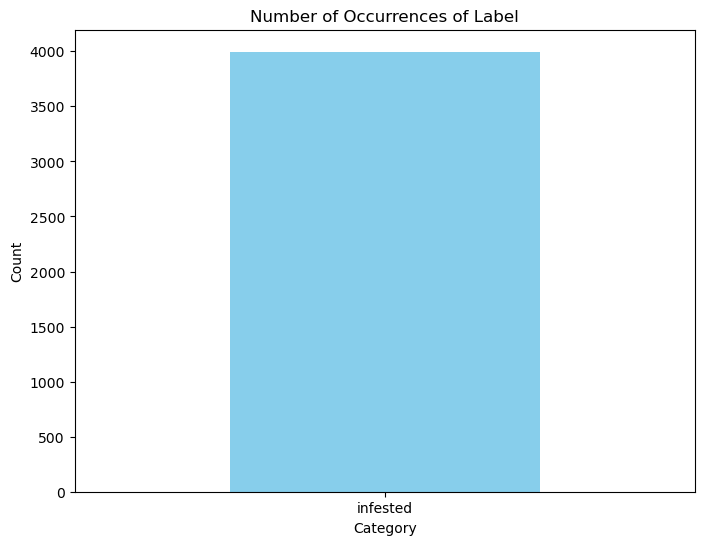

In [73]:
counts = df['Label'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='skyblue')

# Rotate x-axis labels to be horizontal
plt.xticks(rotation=0)

# Add labels and title
plt.title('Number of Occurrences of Label')
plt.xlabel('Category')
plt.ylabel('Count')

# Show the plot
plt.show()


In [2]:
df["Label"] = df['Number of flies'].astype(str) + '_' + df['Number of flies'].astype(str)
df['Label'].mask(df['Number of flies'] == 0, '0', inplace=True)
df

NameError: name 'df' is not defined

In [77]:
df_sub = df[['Subfolder', 'Label']]


In [78]:
df_unique = df_sub.drop_duplicates()
df_unique

,Subfolder,Label
0,CRI_D4_100_1_23216_01,100
36,CRI_D4_100_2_23217_01,100
72,CRI_D4_100_3_23218_01,100
108,CRI_D4_100_4_23219_01,100
144,CRI_D4_100_5_23220_01,100
...,...,...
3816,CRI_D10_50_2_23301_01,50
3852,CRI_D10_50_3_23302_01,50
3888,CRI_D10_50_4_23303_01,50
3924,CRI_D10_50_5_23304_01,50


In [79]:
from sklearn.model_selection import train_test_split

# Dividi il dataset in train, val e test
u_train_df, u_test_df = train_test_split(df_unique, test_size=0.3, stratify=df_unique['Label'], random_state=42)
# u_train_df, u_val_df = train_test_split(u_train_df, test_size=0.25, stratify=u_train_df['Label'], random_state=42)

In [80]:
train_df = df.merge(u_train_df['Subfolder'], how='inner', on='Subfolder')
# val_df = df.merge(u_val_df['Subfolder'], how='inner', on='Subfolder')
test_df = df.merge(u_test_df['Subfolder'], how='inner', on='Subfolder')

In [81]:
# from sklearn.model_selection import train_test_split

# # Dividi il dataset in train, val e test
# train_df, test_df = train_test_split(df, test_size=0.3, stratify=df['Label'], random_state=42)
# #train_df, val_df = train_test_split(train_df, test_size=0.25, stratify=train_df['Label'], random_state=42)  # 0.25 * 0.8 = 0.2
# import shutil

# Directory di destinazione
base_dir = "C:/Users/sasir/Desktop/DSL-BIO/data"

sub_dirs = ['train', 'test']

# Crea la struttura delle directory
for sub_dir in sub_dirs:
    dir_path = os.path.join(base_dir, sub_dir)
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    for label in df['Label'].unique():
        label_dir = os.path.join(dir_path, str(label))
        if not os.path.exists(label_dir):
            os.makedirs(label_dir)

# Funzione per copiare i file
def copy_files(df, subset):
    for idx, row in df.iterrows():
        img_path = row['Image']
        label = row['Label']
        dest_dir = os.path.join(base_dir, subset, str(label), str(idx)+".jpg")
        shutil.copy(img_path, dest_dir)

# Copia le immagini nelle rispettive cartelle
copy_files(train_df, 'train')
#copy_files(val_df, 'val')
copy_files(test_df, 'test')

print("Immagini suddivise con successo!")

Immagini suddivise con successo!
